In [21]:
from pathlib import Path
from omegaconf import OmegaConf
import numpy as np
import pandas as pd
from src.ml_utils import downsample_negatives
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    precision_score,
    recall_score,
    accuracy_score
)

filepaths = OmegaConf.load("../configs/filepaths/base.yaml")

In [7]:
split_idx = 0
exp_id = '0'
model_id = '2037b6b3ceaa4819acf4884636a1f540'

dataset = 'sprhea'
toc = 'v3_folded_pt_ns'
split_strategy = 'rcmcs'
n_splits = 3
seed = 1234
rng = np.random.default_rng(seed=seed)

In [8]:
# Load in data
val_data = pd.read_parquet(
            Path(filepaths.scratch) / f"{dataset}_{toc}/{split_strategy}/{n_splits}fold" / f"train_val_{split_idx}.parquet"
        )
val_data['protein_embedding'] = val_data['protein_embedding'].apply(lambda x : np.array(x))
downsample_negatives(val_data, 1, rng)
logits = np.load(Path(filepaths.results) / 'predictions' / exp_id / model_id / f"logits_{split_idx}.npy") # Load predictions
ypred = (logits > 0.5).astype(np.int32)

In [9]:
val_data.head()

,protein_idx,reaction_idx,pid,rid,protein_embedding,smarts,reaction_center,y
0,222,187,Q9KJ20,7694,"[-0.012849729, 0.16863914, -0.07288795, -0.055...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
1,223,187,Q83WC3,7694,"[-0.020623509, 0.14122067, -0.12404032, -0.027...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
2,224,187,Q9KJ21,7694,"[-0.01765835, 0.14142956, -0.0953328, -0.06397...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
3,13363,187,Q9KJ22,7694,"[-0.044674527, 0.17813939, -0.057687543, -0.07...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
4,13364,187,Q7U4Z8,7694,"[-0.029929712, 0.16648583, -0.016743593, -0.03...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9546972189282972


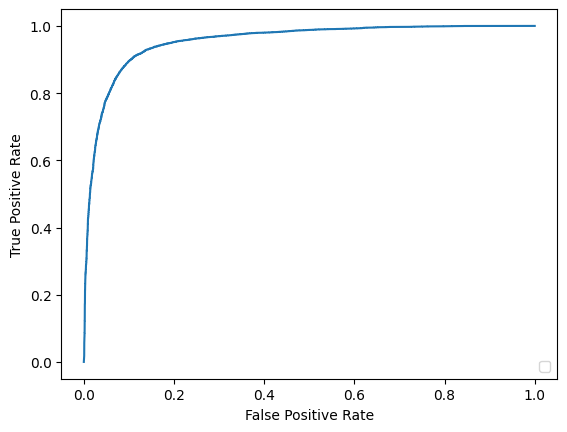

In [10]:
fpr, tpr, _ = roc_curve(val_data['y'], logits)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(roc_auc_score(val_data['y'], logits))

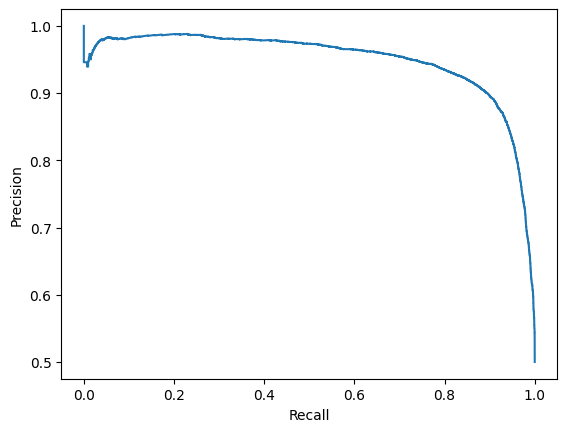

In [11]:
prec, recall, _ = precision_recall_curve(val_data['y'], logits)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [12]:
print(f"Precision: {precision_score(val_data['y'], ypred)}")
print(f"Recall: {recall_score(val_data['y'], ypred)}")
print(f"Accuracy: {accuracy_score(val_data['y'], ypred)}")

Precision: 0.9543742151527836
Recall: 0.7006760909649662
Accuracy: 0.8335894283958205


In [1]:
import mlflow

In [3]:
mlflow.get_tracking_uri()

'file:///home/stef/hiec/notebooks/mlruns'

In [4]:
mlflow.get_registry_uri()

'file:///home/stef/hiec/notebooks/mlruns'

In [5]:
mlflow.set_tracking_uri("file:///home/stef/quest_data/hiec/results/runs")

In [12]:
type(mlflow.get_run(run_id='d06f3044e5894cc8889a645420651f62').data)

mlflow.entities.run_data.RunData

In [17]:
mlflow.get_run(run_id='d06f3044e5894cc8889a645420651f62')

<Run: data=<RunData: metrics={'epoch': 24.0,
 'train_loss': 0.4914122521877289,
 'val/accuracy': 0.8147380948066711,
 'val/binary_precision': 0.9465327858924866,
 'val/binary_recall': 0.6670027375221252,
 'val/f1': 0.7818900942802429,
 'val/mcc': 0.6587910652160645,
 'val/prc': 0.9206308722496033,
 'val/roc': 0.9066384434700012,
 'val_loss': 0.7818900942802429}, params={'data/dataset': 'sprhea',
 'data/embed_type': 'esm',
 'data/n_splits': '3',
 'data/neg_multiple': '1',
 'data/seed': '1234',
 'data/split_bounds': '[100, 80, 60, 40]',
 'data/split_idx': '1',
 'data/split_strategy': 'rcmcs',
 'data/subdir_patt': 'sprhea_v3_folded_pt_ns/rcmcs/3fold',
 'data/test_percent': '20',
 'data/toc': 'v3_folded_pt_ns',
 'exp': 'None',
 'model/agg': 'None',
 'model/d_h_encoder': '30',
 'model/encoder_depth': 'None',
 'model/featurizer': 'mfp',
 'model/message_passing': 'None',
 'model/model': 'linear',
 'model/name': 'mfp',
 'model/pred_head': 'DotSig',
 'model/radius': '6',
 'model/vec_len': '1024

In [14]:
data = mlflow.get_run(run_id='d06f3044e5894cc8889a645420651f62').data
for elt in data:
    print(elt)

('metrics', {'train_loss': 0.4914122521877289, 'epoch': 24.0, 'val_loss': 0.7818900942802429, 'val/f1': 0.7818900942802429, 'val/binary_precision': 0.9465327858924866, 'val/mcc': 0.6587910652160645, 'val/binary_recall': 0.6670027375221252, 'val/prc': 0.9206308722496033, 'val/accuracy': 0.8147380948066711, 'val/roc': 0.9066384434700012})
('params', {'exp': 'None', 'training/metrics': "['BinaryF1Metric', 'BinaryPrecision', 'BinaryRecall', 'BinaryMCC', 'BinaryAccuracyMetric', 'BinaryAUPRCMetric', 'BinaryAUROCMetric']", 'training/pos_multiplier': '1', 'training/n_epochs': '25', 'data/subdir_patt': 'sprhea_v3_folded_pt_ns/rcmcs/3fold', 'data/n_splits': '3', 'data/neg_multiple': '1', 'data/dataset': 'sprhea', 'data/split_idx': '1', 'data/seed': '1234', 'data/split_bounds': '[100, 80, 60, 40]', 'data/embed_type': 'esm', 'data/test_percent': '20', 'data/toc': 'v3_folded_pt_ns', 'data/split_strategy': 'rcmcs', 'model/agg': 'None', 'model/message_passing': 'None', 'model/name': 'mfp', 'model/mod

In [16]:
mlflow.get_run(run_id='d06f3044e5894cc8889a645420651f62').info.artifact_uri

'file:///projects/p30041/spn1560/hiec/results/runs/0/d06f3044e5894cc8889a645420651f62/artifacts'

In [24]:
path = Path("/home/stef/quest_data/hiec/results/predictions/c304922d14b4467c8f03bf01e50c7757/target_output.parquet")
pd.read_parquet(path)

,protein_idx,reaction_idx,pid,rid,y,logits
0,97,160,Q9XU42,1036,1,0.592269
1,40,49,Q62967,1113,1,0.445196
2,11,18,B5APK2,1786,1,0.536023
3,63,92,Q06HQ7,7702,1,0.617381
4,68,116,P9WN81,1505,1,0.624356
...,...,...,...,...,...,...
75,47,154,P34891,2027,0,0.418126
76,31,98,Q9I700,8345,0,0.444636
77,32,81,Q7A742,687,0,0.594715
78,94,45,B0R2Z3,5930,0,0.594715
